In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse as sp_sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/gdrive/My Drive/project/50000.csv',encoding='ISO-8859-1')
# data['tags'] = data['tags'].apply(literal_eval)
# x = data.nutrition
x = data.drop(["name","id","contributor_id","submitted","steps","tags","description","ingredients"],axis = 1)
y = data['low-sodium']


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert each category in the label to an integer
# le = LabelEncoder()
# y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/5,random_state=0)

In [ ]:
print(y)
print(y.shape)

0        1
1        1
2        0
3        0
4        1
        ..
49995    1
49996    1
49997    0
49998    0
49999    0
Name: low-sodium, Length: 50000, dtype: int64
(50000,)


In [ ]:
print(y_train)

20330    0
17532    1
45819    0
34807    0
31888    0
        ..
21243    1
45891    0
42613    0
43567    0
2732     0
Name: low-sodium, Length: 40000, dtype: int64


In [ ]:
print(X_train)

       minutes  healthy  ...  stated_fat  total_carbonhydrate
20330       70        0  ...          29                    6
17532       60        1  ...           6                   13
45819       50        0  ...           0                    5
34807      130        1  ...           0                    5
31888       25        0  ...          12                    3
...        ...      ...  ...         ...                  ...
21243       10        1  ...          29                    9
45891       10        0  ...           0                    1
42613       20        0  ...           0                    0
43567        1        0  ...           0                    1
2732        20        0  ...          58                   18

[40000 rows x 19 columns]


 **K-NN**

In [9]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,21): # Declare an of the KNN classifier class with the value with neighbors.

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train) # Fit the model with training data and target values
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [10]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [11]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.88000000000001 % and k = [11]


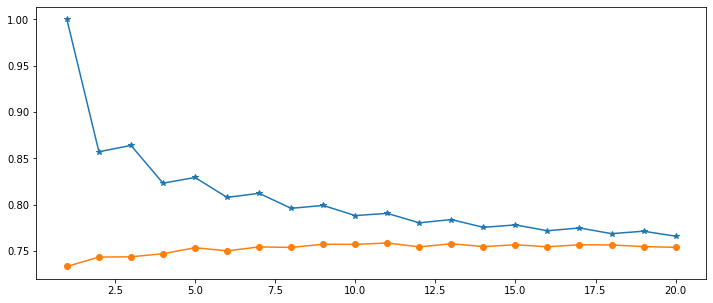

In [12]:
plt.figure(figsize=(12,5))
plt.plot(range(1,21),train_scores,marker='*',label='Train Score')
plt.plot(range(1,21),test_scores,marker='o',label='Test Score')

In [17]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7588

In [19]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,6299,810,7109
1,1602,1289,2891
All,7901,2099,10000


In [20]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      7109
           1       0.61      0.45      0.52      2891

    accuracy                           0.76     10000
   macro avg       0.71      0.67      0.68     10000
weighted avg       0.74      0.76      0.75     10000



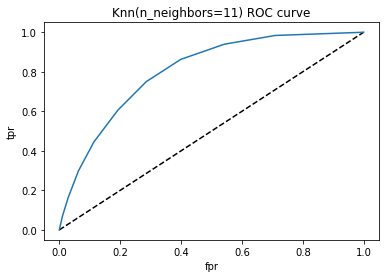

In [21]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [22]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8032234778321399

In [23]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.73975
Best Parameters: {'n_neighbors': 8}


**NAIVE** **BAYES**

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [25]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

# Training your model 
mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [27]:
mod.score(X_test,y_test)

0.9965

In [28]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[7075   34]
 [   1 2890]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       0.99      1.00      0.99      2891

    accuracy                           1.00     10000
   macro avg       0.99      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**NN**

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [30]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.35368448
Iteration 2, loss = 0.06091197
Iteration 3, loss = 0.01258076
Iteration 4, loss = 0.00531883
Iteration 5, loss = 0.00262869
Iteration 6, loss = 0.00168655
Iteration 7, loss = 0.00119119
Iteration 8, loss = 0.00089689
Iteration 9, loss = 0.00070630
Iteration 10, loss = 0.00057198
Iteration 11, loss = 0.00046501
Iteration 12, loss = 0.00036705
Iteration 13, loss = 0.00027386
Iteration 14, loss = 0.00018773
Iteration 15, loss = 0.00014641
Iteration 16, loss = 0.00011984
Iteration 17, loss = 0.00009926
Iteration 18, loss = 0.00008376
Iteration 19, loss = 0.00007177
Iteration 20, loss = 0.00006193
Iteration 21, loss = 0.00005394
Iteration 22, loss = 0.00004738
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [31]:
predictions = mlp.predict(X_test)

from sklearn import metrics 
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 1.0
[[7109    0]
 [   0 2891]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       1.00      1.00      1.00      2891

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [32]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

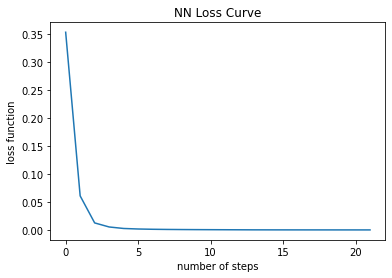

In [34]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [35]:
(mlp.intercepts_[0]).shape

(10,)

In [36]:
(mlp.coefs_[0]).shape

(19, 10)

In [37]:
mlp.intercepts_[0]

array([ 0.7180897 ,  0.11634228,  0.3771261 ,  0.72529606,  0.35255133,
        0.42571984, -0.28109234,  0.25889351,  0.85043747,  0.33175602])

In [38]:
mlp.coefs_[0]

array([[-1.72022248e-01,  1.13937434e-01,  7.61581037e-02,
         1.99643179e-01, -4.52987781e-01,  7.59633865e-02,
         1.43812762e-01, -1.99514115e-01, -5.08964714e-02,
         1.19743267e-01],
       [ 5.00222181e-01,  5.59374577e-02, -6.60455057e-01,
         1.42525835e-01, -4.46488981e-01,  3.34977552e-01,
        -1.97684079e-01, -1.40015547e-01, -1.68360449e-01,
         2.72420909e-01],
       [ 3.04382558e-01,  1.40579383e-01, -2.38328765e-01,
        -3.16644214e-01, -4.95139153e-01, -3.26698181e-01,
        -9.24217363e-02,  2.34650808e-01,  2.28208897e-01,
        -7.06723415e-02],
       [ 2.83633195e-01, -5.41641222e-02, -4.18682611e-01,
        -1.20742213e-01, -9.56169428e-02, -1.43042302e-03,
         4.50431116e-01,  4.08475584e-03,  1.01094446e-01,
        -1.27332134e-01],
       [-9.09506057e-01,  8.81535562e-01, -7.06330799e-01,
        -1.96044670e-01, -4.70252426e-01,  5.97785337e-01,
         1.89026257e-01,  1.07407395e+00,  7.64428740e-02,
        -8.

In [39]:
#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train) 

predictions = mlp.predict(X_test)  

Iteration 1, loss = 0.48409866
Iteration 2, loss = 0.26013081
Iteration 3, loss = 0.15304984
Iteration 4, loss = 0.10415700
Iteration 5, loss = 0.08049534
Iteration 6, loss = 0.06681169
Iteration 7, loss = 0.05699500
Iteration 8, loss = 0.04942283
Iteration 9, loss = 0.04336102
Iteration 10, loss = 0.03839551
Iteration 11, loss = 0.03409214
Iteration 12, loss = 0.03042233
Iteration 13, loss = 0.02721323
Iteration 14, loss = 0.02438818
Iteration 15, loss = 0.02192344
Iteration 16, loss = 0.01976048
Iteration 17, loss = 0.01781974
Iteration 18, loss = 0.01609090
Iteration 19, loss = 0.01457330
Iteration 20, loss = 0.01320164
Iteration 21, loss = 0.01198794
Iteration 22, loss = 0.01091138
Iteration 23, loss = 0.00992869
Iteration 24, loss = 0.00905401
Iteration 25, loss = 0.00826426
Iteration 26, loss = 0.00754814
Iteration 27, loss = 0.00689936
Iteration 28, loss = 0.00631290
Iteration 29, loss = 0.00577323
Iteration 30, loss = 0.00528509
Iteration 31, loss = 0.00483875
Iteration 32, los

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

Accuracy 0.9999
[[7109    0]
 [   1 2890]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       1.00      1.00      1.00      2891

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Logistic** **Regression**

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [42]:
logreg.intercept_.T

array([-2.32353275])

In [43]:
logreg.coef_.T

array([[-1.89080191e-03],
       [ 1.70655986e-01],
       [ 8.85500178e-02],
       [ 1.84953563e-01],
       [ 3.91530601e+00],
       [ 8.58644954e-02],
       [ 3.68770702e-01],
       [-1.66474580e-02],
       [ 1.54437890e-02],
       [ 1.20385963e-02],
       [ 5.50744394e-02],
       [-6.53513389e-02],
       [ 2.20040825e-02],
       [ 4.39464542e-02],
       [ 2.43242308e-02],
       [-2.67225385e-01],
       [ 2.18250153e-02],
       [ 3.41853322e-02],
       [ 1.16560612e-02]])

In [44]:
print(y_test)

11841    0
19602    1
45519    0
25747    1
42642    0
        ..
25091    0
27853    0
47278    0
37020    1
2217     0
Name: low-sodium, Length: 10000, dtype: int64


In [45]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
##before processing data in PCA, we got 0.73 accurancy, from this we can observe the accurancy do not decrease a lot
#we can also normally use the model, and largely reduce caculation by using PCA

[[7109    0]
 [   0 2891]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       1.00      1.00      1.00      2891

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [47]:
#!pip install scikit-plot

In [48]:
#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

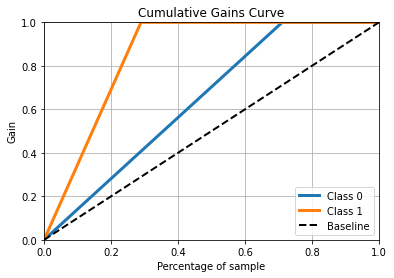

In [49]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

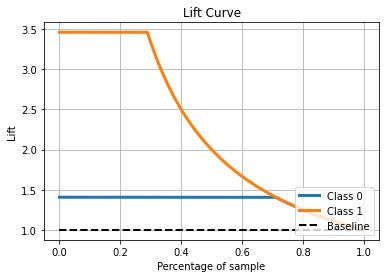

In [50]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()